In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
print(np.__version__)
print(pd.__version__)
print(sklearn.__version__)

1.26.4
2.2.2
1.5.2


In [3]:
df = pd.read_csv('Mumbai House Prices.csv')

In [4]:
df.head()

,bhk,type,locality,area,price,price_unit,region,status,age
0,3,Apartment,Lak And Hanware The Residency Tower,685,2.50,Cr,Andheri West,Ready to move,New
1,2,Apartment,Radheya Sai Enclave Building No 2,640,52.51,L,Naigaon East,Under Construction,New
2,2,Apartment,Romell Serene,610,1.73,Cr,Borivali West,Under Construction,New
3,2,Apartment,Soundlines Codename Urban Rainforest,876,59.98,L,Panvel,Under Construction,New
4,2,Apartment,Origin Oriana,659,94.11,L,Mira Road East,Under Construction,New


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76038 entries, 0 to 76037
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bhk         76038 non-null  int64  
 1   type        76038 non-null  object 
 2   locality    76038 non-null  object 
 3   area        76038 non-null  int64  
 4   price       76038 non-null  float64
 5   price_unit  76038 non-null  object 
 6   region      76038 non-null  object 
 7   status      76038 non-null  object 
 8   age         76038 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 5.2+ MB


In [6]:
df.isnull().sum()

,0
bhk,0
type,0
locality,0
area,0
price,0
price_unit,0
region,0
status,0
age,0


In [7]:
data = df.copy()

In [8]:
df.shape

(76038, 9)

In [9]:
w= df['bhk'].value_counts()

In [10]:
df['region'].value_counts()

,count
region,
Thane West,14868
Mira Road East,9902
Dombivali,3041
Kandivali East,2568
Kharghar,2362
...,...
Police Colony,1
GTB Nagar,1
Bandra,1


In [11]:
df['status'].value_counts()

,count
status,
Ready to move,44982
Under Construction,31056


In [12]:
df['locality'].value_counts()

,count
locality,
Hiranandani Meadows,861
Sheth Avalon,516
T Bhimjyani The Verraton,499
ACME Ozone Phase 2,467
Runwal Gardens,389
...,...
HP Anton CHSL Rishab Anton,1
Reputed Builder Shankar Heritage,1
Reputed Builder Aishwarya Apartment,1


In [13]:
df['age'].value_counts()

,count
age,
New,38072
Resale,23357
Unknown,14609


In [14]:
df['area'].value_counts().head(5)

,count
area,
650,1662
1050,1381
1100,1151
1650,1041
750,950


In [15]:
df['area'].max()

16000

In [16]:
df['area'].min()

127

In [17]:
df[df['area']== 16000]

,bhk,type,locality,area,price,price_unit,region,status,age
60864,10,Apartment,JP Chalet Amar,16000,50.0,Cr,Juhu,Ready to move,Unknown
68538,10,Apartment,Indiabulls Blu Tower D,16000,40.0,Cr,Worli,Ready to move,Unknown
68539,10,Apartment,Sunteck Signature Island,16000,50.0,Cr,Bandra Kurla Complex,Ready to move,Unknown


In [18]:
df[df['area']== 127]

,bhk,type,locality,area,price,price_unit,region,status,age
20784,1,Apartment,JP North Barcelona,127,59.0,L,Mira Road East,Under Construction,New
23438,1,Apartment,JP North Barcelona,127,59.0,L,Mira Road East,Under Construction,New
24503,1,Apartment,JP North Barcelona,127,59.0,L,Mira Road East,Under Construction,New
29816,1,Apartment,JP North Barcelona,127,72.0,L,Mira Road East,Under Construction,New
42185,1,Apartment,JP North Barcelona,127,59.0,L,Mira Road East,Under Construction,New


In [19]:
Cr_df = df[df['price_unit']== 'Cr']

In [20]:
L_df = df[df['price_unit']== 'L']

In [21]:
Cr_df['bhk'].value_counts()

,count
bhk,
2,18981
3,14250
4,3880
1,3082
5,605
6,148
7,16
8,8
10,6


In [22]:
L_df['bhk'].value_counts()

,count
bhk,
1,21531
2,12448
3,1023
4,54
5,1


In [23]:
Cr_df['type'].value_counts()

,count
type,
Apartment,40738
Villa,170
Independent House,46
Studio Apartment,24
Penthouse,3


In [24]:
L_df['type'].value_counts()

,count
type,
Apartment,34116
Studio Apartment,858
Villa,56
Independent House,27


In [25]:
Cr_df['age'].value_counts()

,count
age,
New,17807
Resale,12019
Unknown,11155


In [26]:
L_df['age'].value_counts()

,count
age,
New,20265
Resale,11338
Unknown,3454


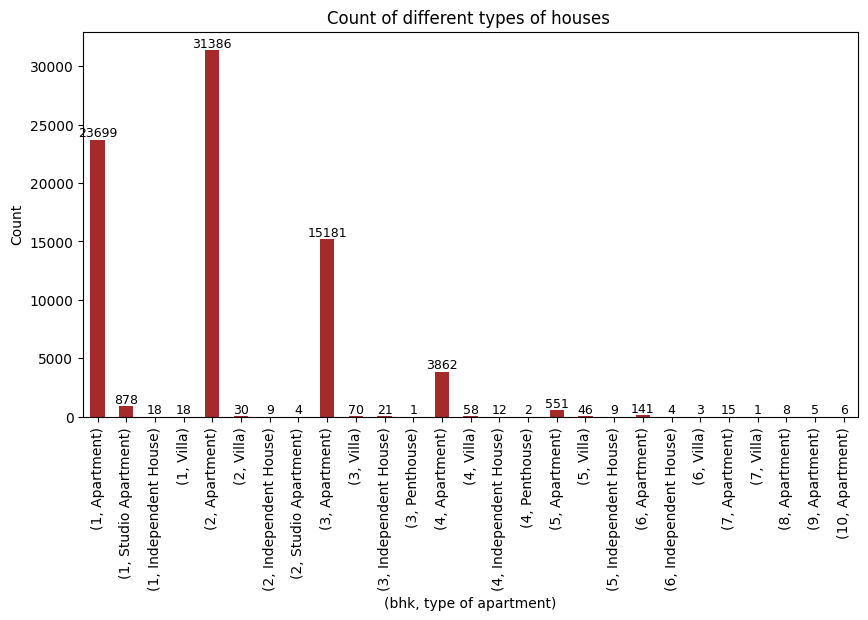

In [27]:
w = df.groupby('bhk')['type'].value_counts()

fig,ax = plt.subplots(figsize=(10,5))
ax = w.plot.bar(w.index,w.values,color="Brown")
for i, value in enumerate(w.values):
    ax.text(i, value, str(value), ha='center', va='bottom',fontsize= 9)
plt.xlabel("(bhk, type of apartment)")
plt.ylabel("Count")
plt.title("Count of different types of houses ")
plt.show()

## **since apartments have usually 5-6 BHKs max, so dropping 7,8,9,10 BHKs from dataset**

In [28]:
df = df[df['bhk']<=6]

In [29]:
def convert_price(row):                           # Standardizing Crore and Lakh prices in Lakhs only.
  if(row['price_unit']=='Cr'):
    return row['price']*100
  else:
    return row['price']

df['Standardised_price'] = df.apply(convert_price,axis = 1)
df = df.drop(['price','price_unit'],axis=1)

df.head()

,bhk,type,locality,area,region,status,age,Standardised_price
0,3,Apartment,Lak And Hanware The Residency Tower,685,Andheri West,Ready to move,New,250.00
1,2,Apartment,Radheya Sai Enclave Building No 2,640,Naigaon East,Under Construction,New,52.51
2,2,Apartment,Romell Serene,610,Borivali West,Under Construction,New,173.00
3,2,Apartment,Soundlines Codename Urban Rainforest,876,Panvel,Under Construction,New,59.98
4,2,Apartment,Origin Oriana,659,Mira Road East,Under Construction,New,94.11


<Axes: ylabel='bhk'>

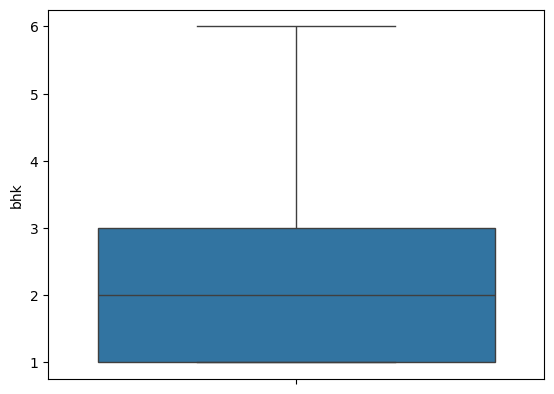

In [30]:
sns.boxplot(df['bhk'])

In [31]:
df['area'].describe()

,area
count,76003.000000
mean,1021.972383
std,654.998434
min,127.000000
25%,640.000000
50%,871.000000
75%,1176.000000
max,10893.000000


In [32]:
(df['area']/df['bhk']).describe()

,0
count,76003.000000
mean,513.144572
std,161.122940
min,127.000000
25%,403.500000
50%,502.500000
75%,600.000000
max,4930.000000


In [33]:
df = df[((df['area']/df['bhk'])>=400)]
df.head()

,bhk,type,locality,area,region,status,age,Standardised_price
3,2,Apartment,Soundlines Codename Urban Rainforest,876,Panvel,Under Construction,New,59.98
5,2,Apartment,Bhoomi Simana Wing A Phase 1,826,Parel,Under Construction,New,330.00
6,5,Villa,Agami Estancia,2921,Boisar,Under Construction,New,199.00
10,1,Studio Apartment,A Plus Golden Corner,502,Badlapur West,Under Construction,New,16.56
11,2,Apartment,Unimont Imperia,950,Khopoli,Under Construction,New,41.75


In [34]:
df['price_per_sqft'] = df['Standardised_price']*100000/df['area']

In [35]:
df.shape

(58428, 9)

In [36]:
df.head()

,bhk,type,locality,area,region,status,age,Standardised_price,price_per_sqft
3,2,Apartment,Soundlines Codename Urban Rainforest,876,Panvel,Under Construction,New,59.98,6847.031963
5,2,Apartment,Bhoomi Simana Wing A Phase 1,826,Parel,Under Construction,New,330.00,39951.573850
6,5,Villa,Agami Estancia,2921,Boisar,Under Construction,New,199.00,6812.735365
10,1,Studio Apartment,A Plus Golden Corner,502,Badlapur West,Under Construction,New,16.56,3298.804781
11,2,Apartment,Unimont Imperia,950,Khopoli,Under Construction,New,41.75,4394.736842


In [37]:
df.describe()

,bhk,area,Standardised_price,price_per_sqft
count,58428.000000,58428.000000,58428.000000,58428.000000
mean,1.972616,1117.075580,175.888234,13981.327400
std,0.959892,705.704053,232.401772,9057.477828
min,1.000000,400.000000,4.490000,646.766169
25%,1.000000,670.000000,63.000000,8148.148148
50%,2.000000,970.000000,106.500000,11702.127660
75%,3.000000,1300.000000,200.000000,17500.000000
max,6.000000,10893.000000,6000.000000,150000.000000


In [38]:
def remove_outliers_sqft(df):
  df_output = pd.DataFrame()
  for key , subdf in df.groupby('region'):
    m = np.mean(df.price_per_sqft)

    st = np.std(df.price_per_sqft)

    gen_df = subdf[(subdf.price_per_sqft > (m-st)) & (subdf.price_per_sqft <= (m+st))]
    df_output = pd.concat([df_output,gen_df], ignore_index = True)
  return df_output
df = remove_outliers_sqft(df)
df.describe()


,bhk,area,Standardised_price,price_per_sqft
count,47586.000000,47586.000000,47586.000000,47586.000000
mean,1.947464,1100.002312,140.948008,12202.192620
std,0.923860,648.266554,117.639085,4699.454551
min,1.000000,400.000000,20.000000,4925.373134
25%,1.000000,680.000000,65.500000,8405.797101
50%,2.000000,981.000000,100.000000,11287.592827
75%,2.000000,1257.750000,175.000000,15832.604946
max,6.000000,8000.000000,1800.000000,23037.037037


In [39]:
df.drop(columns=['price_per_sqft'],inplace=True)

In [40]:
df.head()

,bhk,type,locality,area,region,status,age,Standardised_price
0,1,Apartment,Reputed Builder Ashtavinayak Gruhasankul Phase 2,650,Adaigaon,Ready to move,Resale,35.0
1,2,Apartment,MRK Ajmal Heights,825,Agripada,Ready to move,Resale,140.0
2,2,Apartment,Lokhandwala Galaxy,1650,Agripada,Ready to move,Resale,350.0
3,2,Apartment,Lokhandwala Galaxy,1650,Agripada,Ready to move,Resale,340.0
4,3,Apartment,K Living Allana Mansion,1950,Agripada,Ready to move,Resale,425.0


In [41]:
df.shape

(47586, 8)

In [52]:
r = pd.DataFrame(df.groupby('region')['locality'].unique()).rename(columns={'region': 'Unique Localities'})
r.head()
r.reset_index(inplace=True)

## **WHICH LOCALITIES BELONG TO WHICH REGION**

In [54]:
r[r['region']=="Goregaon East"]

,region,locality
52,Goregaon East,"[Avant Hillway, Mantri Serene, Amal Aspen Park..."


In [55]:
df[df['Standardised_price']<=60.0].head(20)

,bhk,type,locality,area,region,status,age,Standardised_price
0,1,Apartment,Reputed Builder Ashtavinayak Gruhasankul Phase 2,650,Adaigaon,Ready to move,Resale,35.00
11,1,Apartment,Shalibhadra Shalibhadra Amora,475,Agripada,Under Construction,New,27.00
39,1,Studio Apartment,Reputed Builder Barkha Apartment,425,Airoli,Ready to move,Resale,44.00
69,1,Apartment,Reputed Builder Shivam CHS,521,Airoli,Ready to move,Resale,42.00
108,1,Apartment,Gurudatta Bhaurao Park,530,Airoli,Ready to move,Resale,42.00
123,1,Apartment,Raikar Amrut Dham,550,Airoli,Ready to move,Resale,50.00
125,1,Apartment,Gurudatta Bhaurao Park,500,Airoli,Ready to move,Resale,45.00
150,1,Apartment,Krishna Sai Darshan,602,Airoli,Ready to move,Resale,34.92
151,1,Apartment,Sharma My Choice Apartment,560,Airoli,Ready to move,Resale,34.85
156,1,Apartment,Swaraj Homes Surji Dham CHS,620,Airoli,Ready to move,Resale,60.00


# **CLEANED DATA-:**

In [56]:
df.groupby('type')['Standardised_price'].max().sort_values(ascending=False)

,Standardised_price
type,
Villa,1800.0
Apartment,1700.0
Independent House,1000.0
Penthouse,390.0
Studio Apartment,128.0


In [57]:
df.groupby('type')['Standardised_price'].min().sort_values(ascending=False)

,Standardised_price
type,
Penthouse,250.00
Independent House,32.63
Villa,30.00
Studio Apartment,20.50
Apartment,20.00


In [58]:
df.groupby('type')['Standardised_price'].mean().sort_values(ascending=False)

,Standardised_price
type,
Villa,500.551587
Independent House,354.801628
Penthouse,300.000000
Apartment,140.233642
Studio Apartment,45.983929


### **It interprets that generally Villas are more costlier in Mumbai followed by Independent Houses , then Penthouses , apartments and the least costlier in Mumbai are Studio Apartments.**

In [59]:
df.groupby('bhk')['Standardised_price'].mean().sort_values(ascending=False)

,Standardised_price
bhk,
6,730.636364
5,692.912921
4,401.797872
3,223.780782
2,125.009214
1,65.620722


### **It interprets that generally 10,9,8 BHKs are more costlier in Mumbai and 1,2,3 are quite in range for people in Mumbai**

In [60]:
df.groupby('age')['Standardised_price'].mean().sort_values(ascending=False)

,Standardised_price
age,
Unknown,222.165828
Resale,127.271511
New,108.546150


In [61]:
data['age'].mode()

,age
0,New


In [62]:
#df['age'] = df['age'].replace("Unknown","New")
df['age'].value_counts()

,count
age,
New,19712
Resale,17126
Unknown,10748


In [63]:
df['age'].value_counts()

,count
age,
New,19712
Resale,17126
Unknown,10748


In [64]:
df.groupby('status')['Standardised_price'].mean().sort_values(ascending=False)

,Standardised_price
status,
Ready to move,153.878431
Under Construction,113.633347


### **It interprets that Ready To Move Houses are more costly in Mumbai than Under Construction Houses.**

In [65]:
df.groupby('area')['Standardised_price'].mean().sort_values(ascending=False)

,Standardised_price
area,
8000,1580.000000
7000,1335.000000
5872,1300.000000
6048,1200.000000
7200,1150.000000
...,...
717,43.596667
467,43.568889
406,43.473750


In [66]:
df.groupby('locality')['Standardised_price'].mean().sort_values(ascending=False)

,Standardised_price
locality,
Hiranandani Richmond,1700.000000
T Bhimjyani Neelkanth Woods Bungalow M 66,1059.583333
Valencia And Mishal One Marina,1025.000000
Lodha The World Towers World One Tier II,1020.000000
Krishna Heritage,1000.000000
...,...
RK Vaishnavi Hill View,21.500000
Sarthak Homes,21.000000
Bhalchandra Wadnerkar Sai Datta Kripa,21.000000


In [67]:
df.groupby('region')['Standardised_price'].mean().sort_values(ascending=False)

,Standardised_price
region,
Marine Lines,758.333333
Ghodbunder Road,630.000000
Worli,500.583333
Mahalaxmi,420.000000
Mumbai Central,415.000000
...,...
Nalasopara East,31.250000
Karjat,30.792353
mumbai,29.990000


In [68]:
df.head()

,bhk,type,locality,area,region,status,age,Standardised_price
0,1,Apartment,Reputed Builder Ashtavinayak Gruhasankul Phase 2,650,Adaigaon,Ready to move,Resale,35.0
1,2,Apartment,MRK Ajmal Heights,825,Agripada,Ready to move,Resale,140.0
2,2,Apartment,Lokhandwala Galaxy,1650,Agripada,Ready to move,Resale,350.0
3,2,Apartment,Lokhandwala Galaxy,1650,Agripada,Ready to move,Resale,340.0
4,3,Apartment,K Living Allana Mansion,1950,Agripada,Ready to move,Resale,425.0


In [69]:
label_encoder = LabelEncoder()

# Columns to encode
columns_to_encode = ['type', 'status','age','locality','region']

# Apply label encoding to each column
for col in columns_to_encode:
    df[col] = label_encoder.fit_transform(df[col])

In [70]:
df.head()

,bhk,type,locality,area,region,status,age,Standardised_price
0,1,0,4149,650,0,0,1,35.0
1,2,0,2575,825,1,0,1,140.0
2,2,0,2516,1650,1,0,1,350.0
3,2,0,2516,1650,1,0,1,340.0
4,3,0,1924,1950,1,0,1,425.0


In [71]:
df.shape

(47586, 8)

# **MODEL TRAINING**

In [72]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression,  Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [73]:
x = df.drop('Standardised_price',axis=1)
y = df['Standardised_price']

In [74]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [75]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(38068, 7)
(38068,)
(9518, 7)
(9518,)


In [76]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# **Linear Regression**

In [98]:
lr = LinearRegression()
lr.fit(x_train_scaled,y_train)

LinearRegression()

In [99]:
y_pred = lr.predict(x_test_scaled)

print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

2746.0975570389787
0.7984684838218206


## **Lasso**

In [100]:
l = Lasso()
l.fit(x_train_scaled,y_train)

Lasso()

In [101]:
y_pred = l.predict(x_test_scaled)

print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

2753.147931543404
0.7979510686047759


## **Ridge**

In [102]:
r = Ridge()
r.fit(x_train_scaled,y_train)
y_pred = r.predict(x_test_scaled)

print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

2746.097333639792
0.798468500216714


## **Random Forest Regressor**

In [103]:
rf = RandomForestRegressor()
rf.fit(x_train_scaled,y_train)

RandomForestRegressor()

In [104]:
y_pred = rf.predict(x_test_scaled)

print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

677.2688332075164
0.9502963707656071


## **Decision Tree Regressor**

In [91]:
dc = DecisionTreeRegressor()
dc.fit(x_train_scaled,y_train)

DecisionTreeRegressor()

In [92]:
y_pred = dc.predict(x_test_scaled)

print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

1093.0255579700101
0.9197846786780889


## **Saving and using Decision Tree Regressor because its accuracy is good and is good in performance than Random Forest Regressor model which is prone to Overfitting.**

In [87]:
import pickle


In [97]:
pickle.dump(dc,open('DCmodel1.pkl','wb'))

In [90]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with scaling and model training
#pipeline = Pipeline([
    #('scaler', StandardScaler()),             # Step 1: Feature scaling
    #('regressor', RandomForestRegressor())    # Step 2: Train a RandomForest model
#])

# Fit the model
#pipeline.fit(X_train, y_train)

# Predict on test data
#y_pred = pipeline.predict(X_test)

# Model performance
#print("Predictions:", y_pred)